### Definitions

In [1]:
import matplotlib.pyplot as plt

In [ ]:
%run "./File_Uploader.ipynb"

In [3]:
%run "./ANN_Observer.ipynb"

✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.


In [8]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


### Archive from 26.10.2024  CPA on Hundred-Time multiplication, for weighs 1 to X

In [225]:
scope.dis()
target.dis()

(ChipWhisperer Scope ERROR|File naeusbchip.py:108) Scope already disconnected!


In [216]:
make_dir = "makefile_dir_basic_mult"
re_init_config = {"MAKEDIR" : f'./{make_dir}/'}
cw_setuper = CW_Setuper(firmware_reinit = True, re_init_dict  = re_init_config)
scope = cw_setuper.scope
target = cw_setuper.target

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_mult/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11467 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11467 bytes
✔️ Setuper initiated.


Uploading files::   0%|          | 0/3 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/800 [00:00<?, ?it/s]

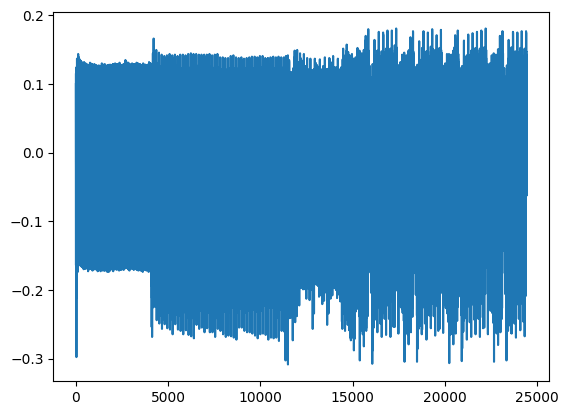

✔️ Saving Rand_input succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

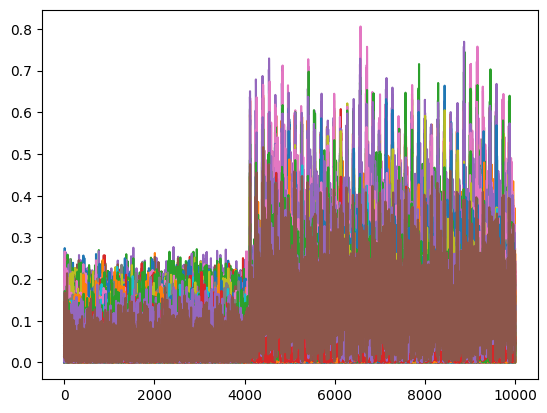

 Index of global max: 6570 and global_max_val: 0.8060093057889959
Local maxims: [16, 16, 16, 64, 64, 16]
 Found the soonest secret value is 16, at the time sample 6570, with correlation secret_corr = 0.806
 Index of global max: 0 and global_max_val: 0.8060093057889959
Local maxims: [16, 16, 16, 64, 64, 16]
 Found the soonest secret value is 16, at the time sample 0, with correlation secret_corr = 0.806
 Index of global max: 6570 and global_max_val: 0.8060093057889959
Local maxims: [16, 16, 16, 64, 64, 16]
 Found the soonest secret value is 16, at the time sample 6570, with correlation secret_corr = 0.806
 Index of global max: 0 and global_max_val: 0.8060093057889959
Local maxims: [16, 16, 16, 64, 64, 16]
 Found the soonest secret value is 16, at the time sample 0, with correlation secret_corr = 0.806
⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1200 [00:00<?, ?it/s]

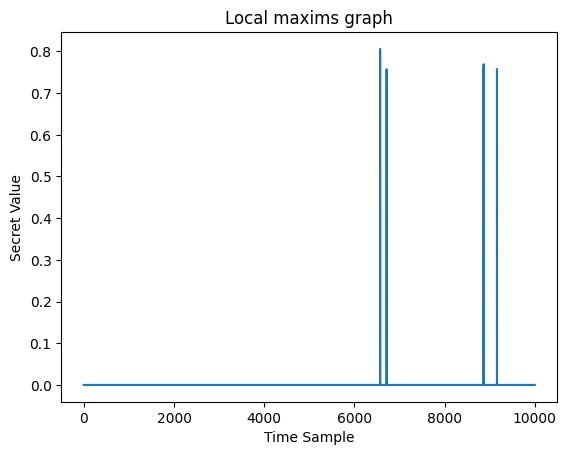

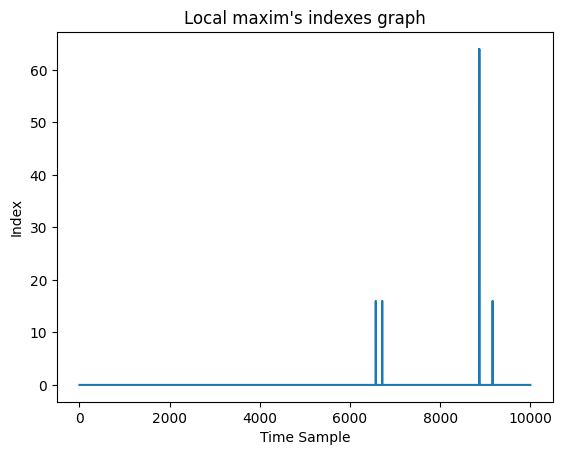

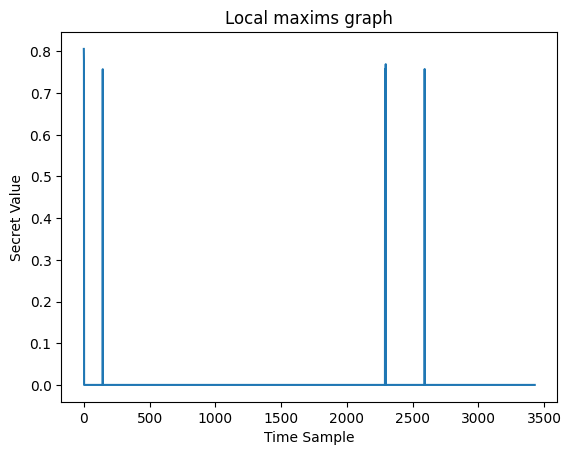

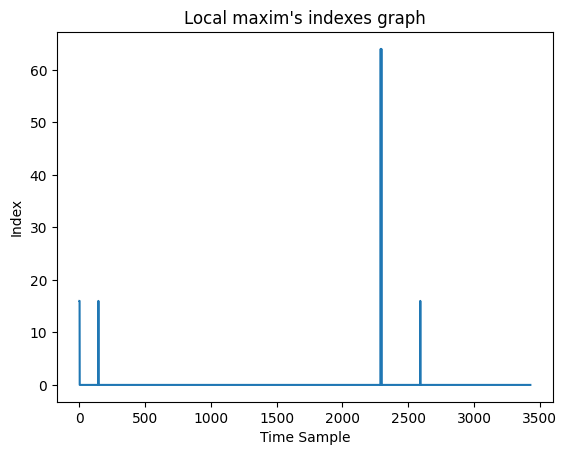

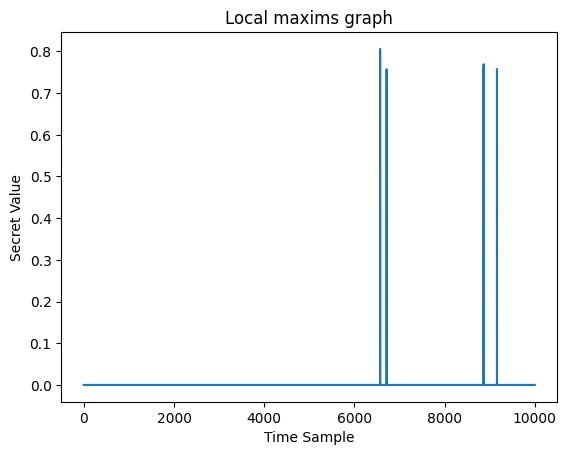

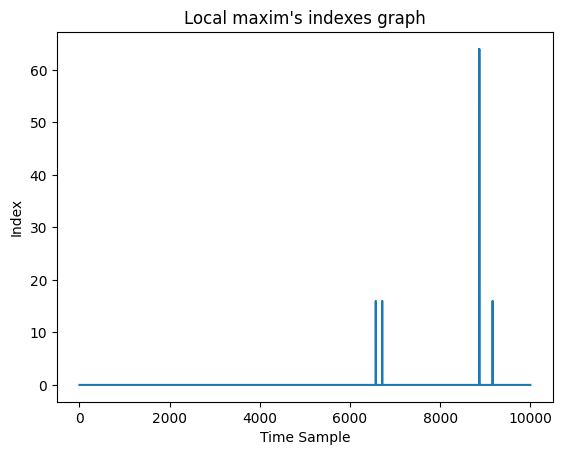

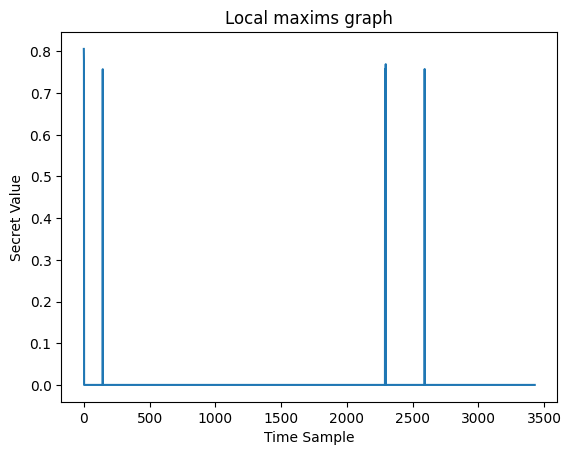

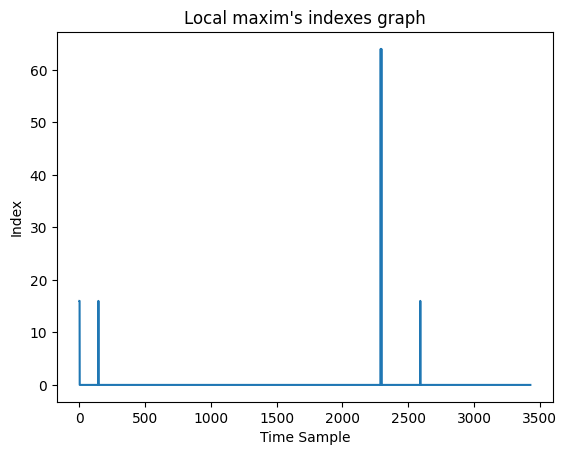

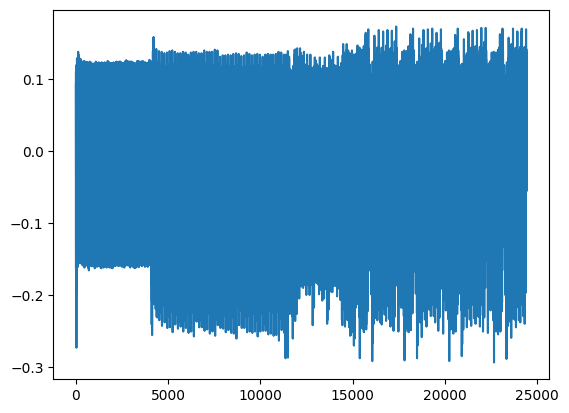

✔️ Saving Rand_input succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

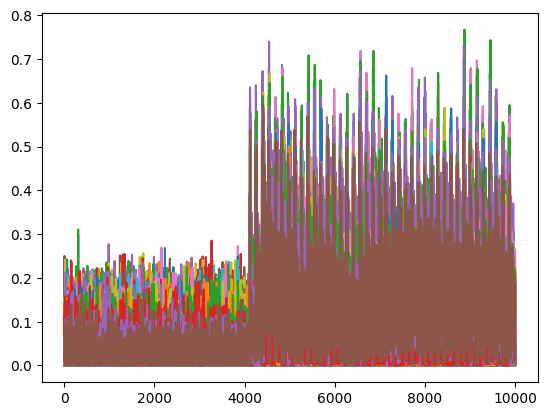

 Index of global max: 8874 and global_max_val: 0.7673605438141891
Local maxims: [4, 4, 16, 32, 64, 32, 32, 32, 32, 32]
 Found the soonest secret value is 4, at the time sample 4541, with correlation secret_corr = 0.739
 Index of global max: 4333 and global_max_val: 0.7673605438141891
Local maxims: [4, 4, 16, 32, 64, 32, 32, 32, 32, 32]
 Found the soonest secret value is 4, at the time sample 0, with correlation secret_corr = 0.739
 Index of global max: 8874 and global_max_val: 0.7673605438141891
Local maxims: [4, 4, 16, 32, 64, 32, 32, 32, 32, 32]
 Found the soonest secret value is 4, at the time sample 4541, with correlation secret_corr = 0.739
 Index of global max: 4333 and global_max_val: 0.7673605438141891
Local maxims: [4, 4, 16, 32, 64, 32, 32, 32, 32, 32]
 Found the soonest secret value is 4, at the time sample 0, with correlation secret_corr = 0.739
⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1400 [00:00<?, ?it/s]

KeyboardInterrupt: 

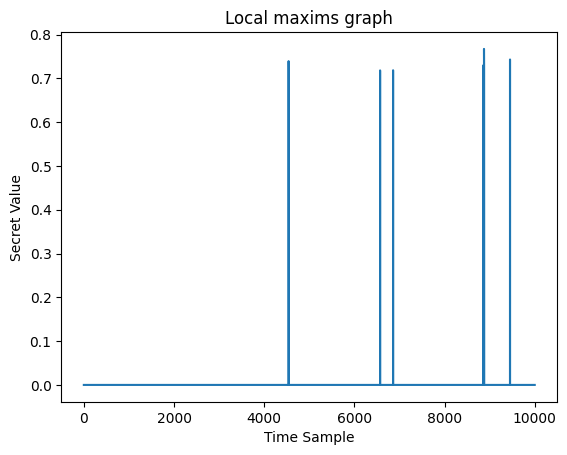

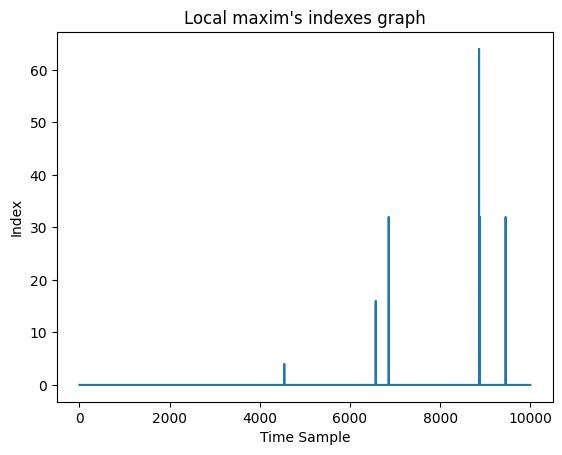

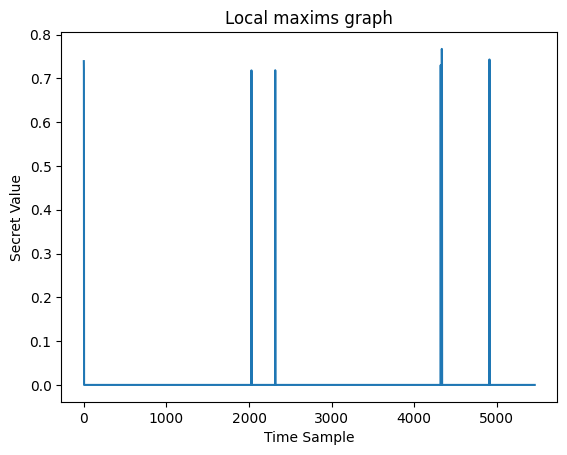

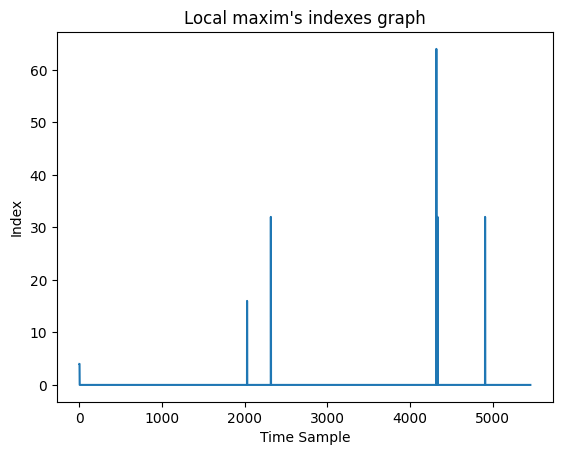

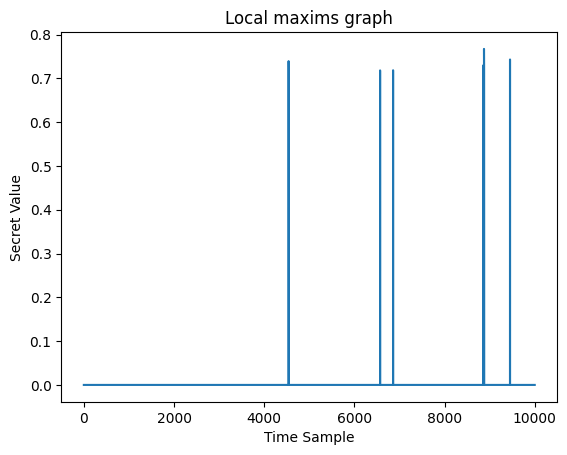

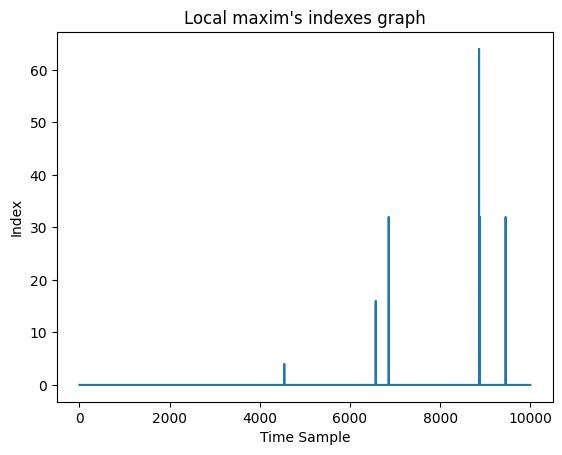

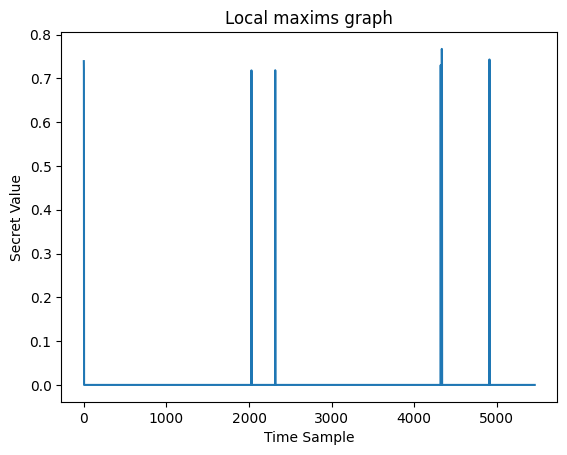

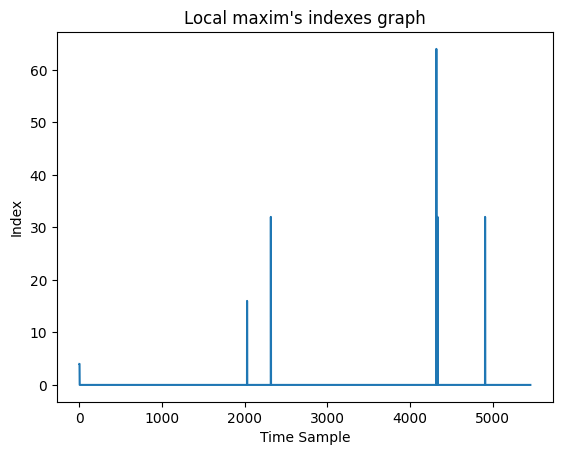

In [223]:
epochs_list = [800, 1200, 1400]
#epochs_list = [1500, 2000, 2500]
ncorr_all = None
decimate = 1
reverse = False
for i in trange(len(epochs_list), desc='Uploading files:'):
    epochs = epochs_list[i]
    cmd = 'p'
    name = f"_HundredTimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
    if reverse:
        name += "ReversedTrigger"
        cmd = 'r'
    scope_setup(samples=24430, decimate=decimate)    
    traces, rand_inputs = measure_traces(cmd=cmd)
    waves = []
    for i in traces:
        waves.append(i[0])
    plot_one(np.array(waves[0]), type = name)
    files = save_data(waves, rand_inputs, name_extended = name)
    #upload_file_to_gdrive(files,  dir_path = "database/")

    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 10000, ith_weight = 0)
    plot_mult(np.array(ncorr_all), type = f"corr_{name}")
    index = 0
    secret_value, time_sample, correlation, localMax_vector = get_weight(np.array(ncorr_all)[:,index:], show_info=True)
    index += time_sample
    secret_value, time_sample, correlation, localMax_vector = get_weight(np.array(ncorr_all)[:,time_sample:], show_info=True)
    index += time_sample
    secret_value, time_sample, correlation, localMax_vector = get_weight(np.array(ncorr_all)[:,time_sample:], show_info=True)
    index += time_sample
    secret_value, time_sample, correlation, localMax_vector = get_weight(np.array(ncorr_all)[:,time_sample:], show_info=True)
    index += time_sample

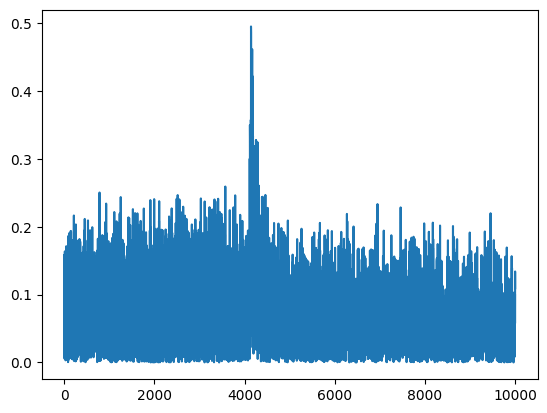

In [214]:
plt.plot(ncorr_all[29])

### Archive from 26.10.2024  CPA on One-Time multiplication, for weigh=5

Uploading files::   0%|          | 0/4 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/800 [00:00<?, ?it/s]

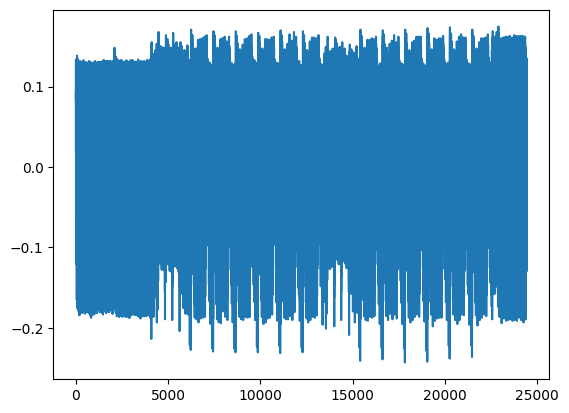

✔️ Saving Rand_input succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

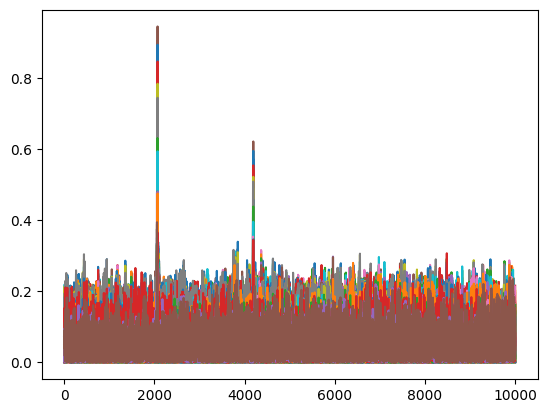

 Index of global max: 2069 and global_max_val: 0.9460392510691825
Local maxims: [5, 5]
 Found the soonest secret value is 5, at the time sample 2064, with correlation secret_corr = 0.903
⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1200 [00:00<?, ?it/s]

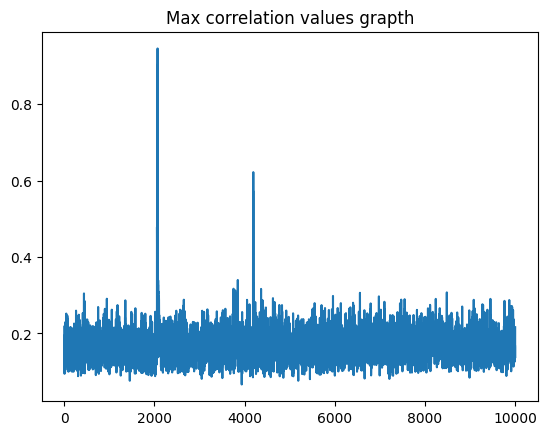

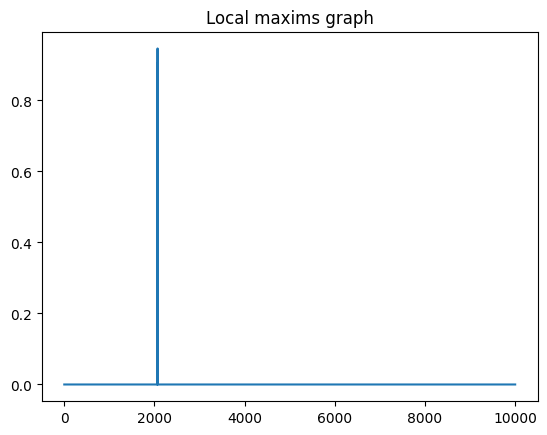

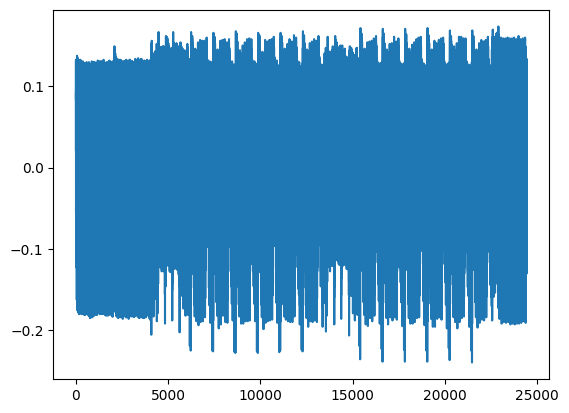

✔️ Saving Rand_input succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

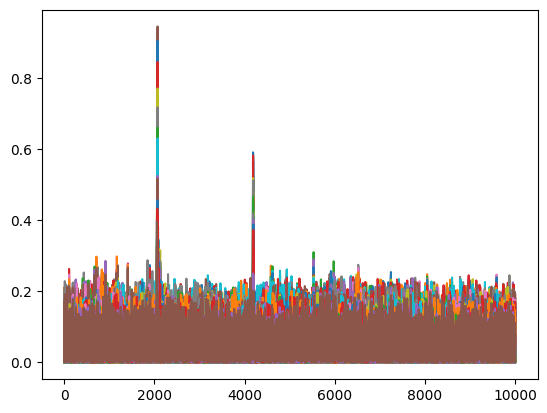

 Index of global max: 2069 and global_max_val: 0.9451393823973006
Local maxims: [5, 5]
 Found the soonest secret value is 5, at the time sample 2064, with correlation secret_corr = 0.907
⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1400 [00:00<?, ?it/s]

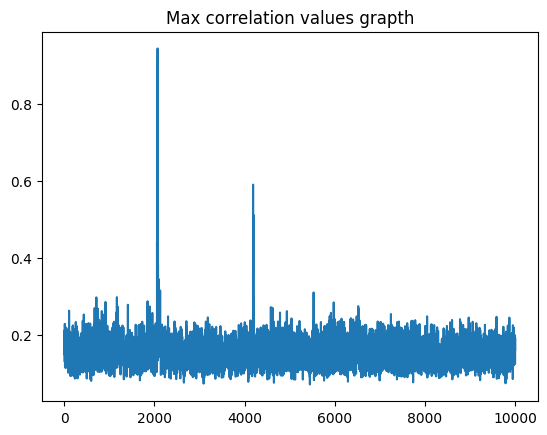

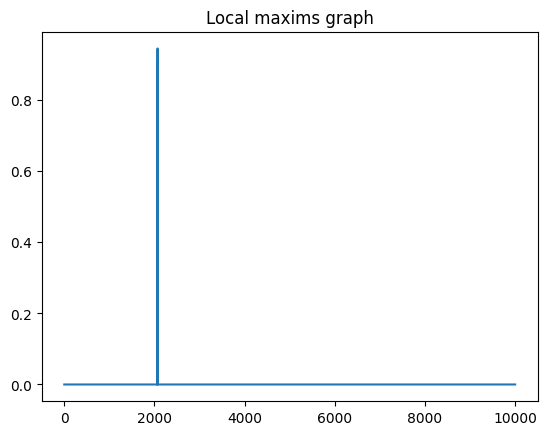

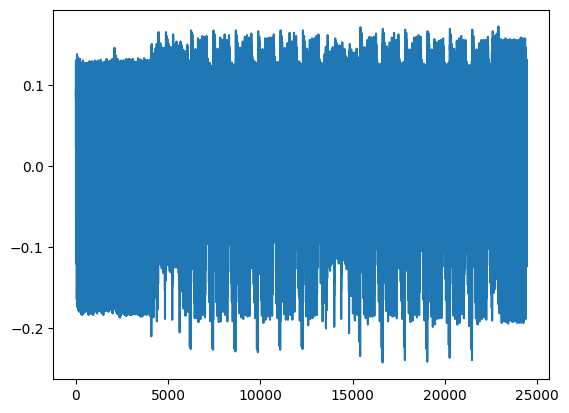

✔️ Saving Rand_input succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

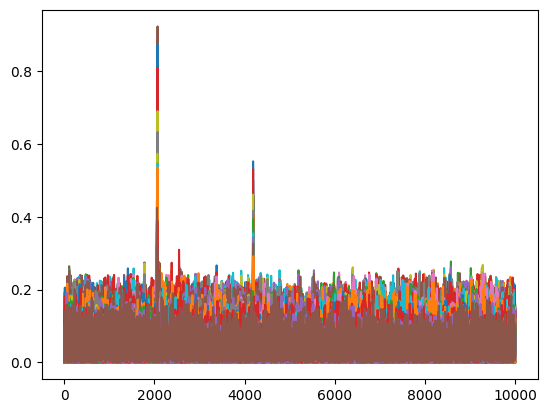

 Index of global max: 2069 and global_max_val: 0.9223923845635692
Local maxims: [5, 5]
 Found the soonest secret value is 5, at the time sample 2064, with correlation secret_corr = 0.885
⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1600 [00:00<?, ?it/s]

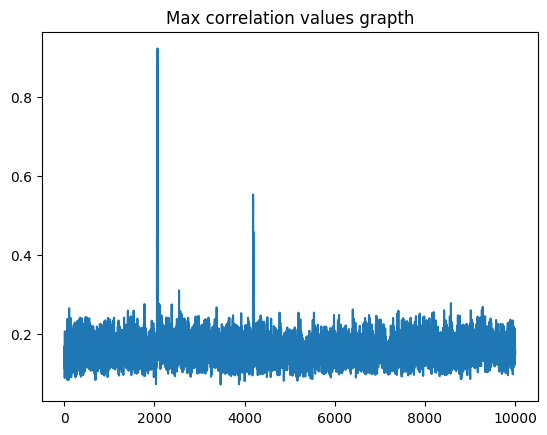

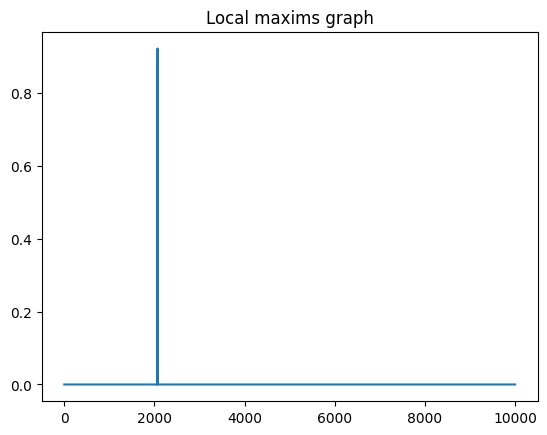

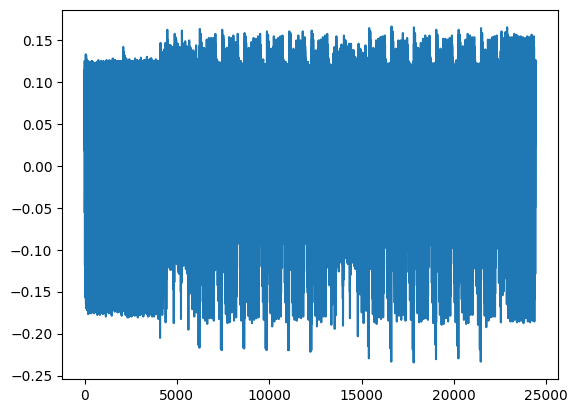

✔️ Saving Rand_input succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

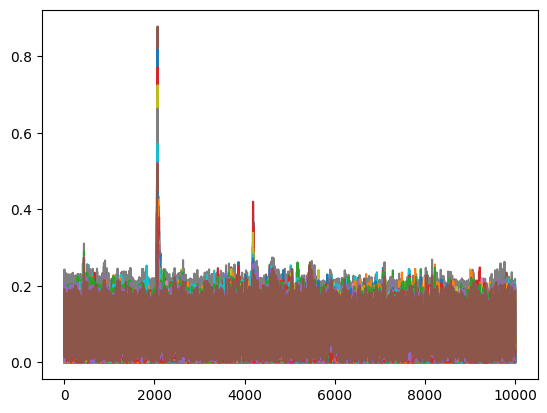

 Index of global max: 2069 and global_max_val: 0.878136498281863
Local maxims: [5, 5, 5]
 Found the soonest secret value is 5, at the time sample 2064, with correlation secret_corr = 0.829


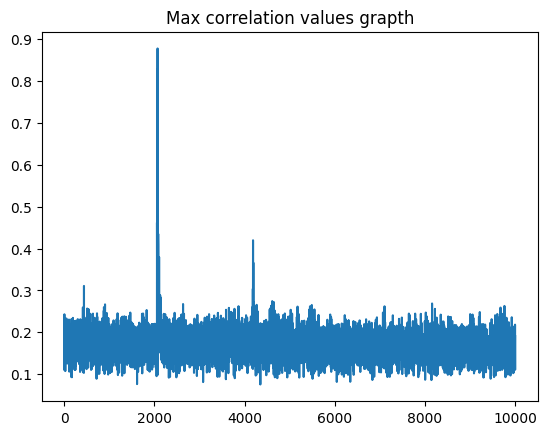

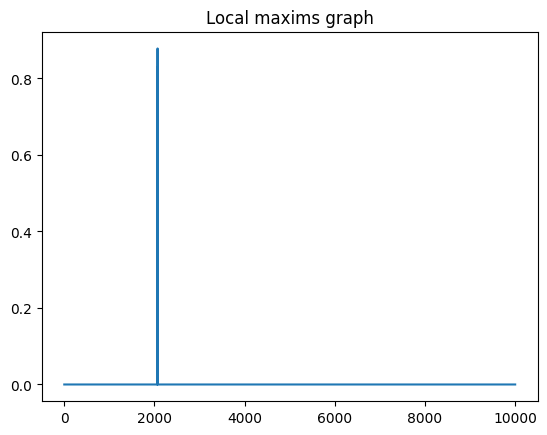

In [140]:
epochs_list = [800, 1200, 1400, 1600]
#epochs_list = [1500, 2000, 2500]
ncorr_all = None
decimate = 2
reverse = False
for i in trange(len(epochs_list), desc='Uploading files:'):
    epochs = epochs_list[i]
    cmd = 'p'
    name = f"_OneTimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
    if reverse:
        name += "ReversedTrigger"
        cmd = 'r'
    scope_setup(samples=24431, decimate=decimate)    
    traces, rand_inputs = measure_traces(cmd=cmd)
    waves = []
    for i in traces:
        waves.append(i[0])
    plot_one(np.array(waves[0]), type = name)
    files = save_data(waves, rand_inputs, name_extended = name)
    #upload_file_to_gdrive(files,  dir_path = "database/")

    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 10000, ith_weight = 0)
    plot_mult(np.array(ncorr_all), type = f"corr_{name}")
    secret_value, time_sample, correlation, localMax_vector = get_weight(np.array(ncorr_all), show_info=True)

 Index of global max: 2069 and global_max_val: 0.9316244015677747
Local maxims: [5, 5]
 Found the soonest secret value is 5, at the time sample 2064, with correlation secret_corr = 0.915


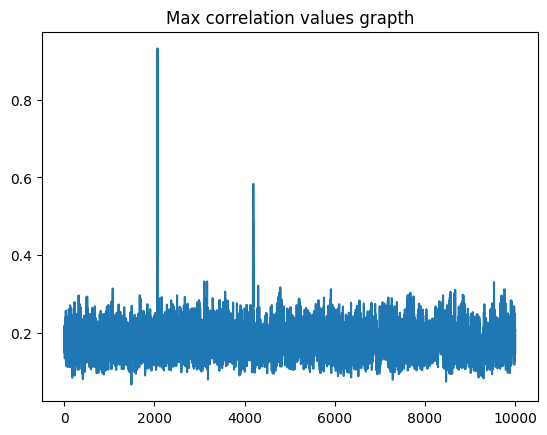

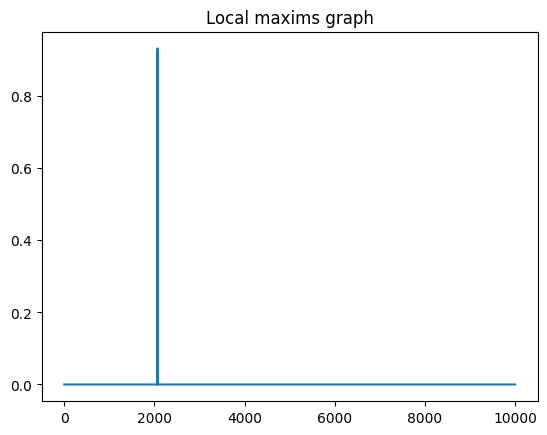

In [134]:
results_directory = {}
secret_value, time_sample, correlation, localMax_vector = get_weight(np.array(ncorr_all), show_info=True)

### Archive from 19.10.2024

Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

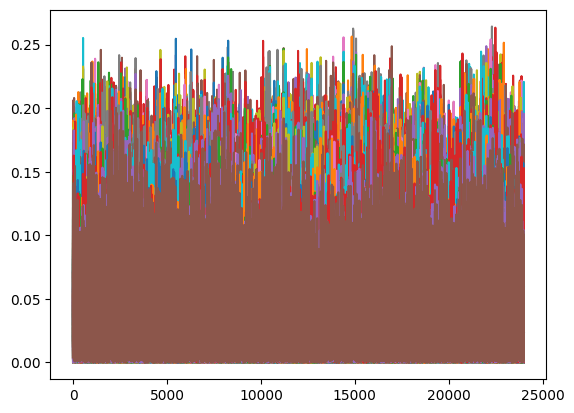

In [133]:
ith_weight = 0
start = ith_weight*epochs
ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 24000, ith_weight = 0)
epochs = 10000
import pandas as pd
norm = pd.DataFrame(ncorr_all)
plot_mult(np.array(ncorr_all), type = "corr_oneTimeMult_1_decimate")

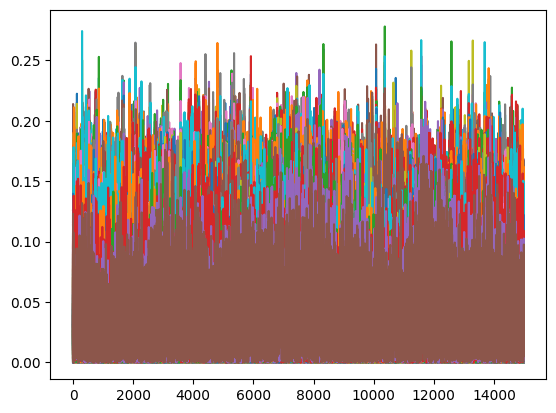

In [79]:
import pandas as pd
norm = pd.DataFrame(ncorr_all)
norm.to_csv("corr_all.csv")
plot_mult(np.array(ncorr_all), type = "corr_oneTimeMult_4_decimate")

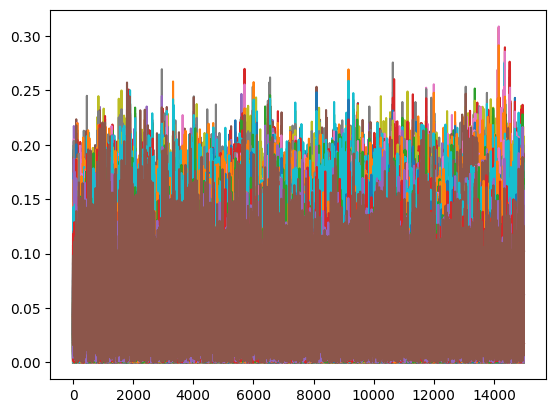

In [75]:
import pandas as pd
norm = pd.DataFrame(ncorr_all)
norm.to_csv("corr_all.csv")
plot_mult(np.array(ncorr_all), type = "corr_oneTimeMult_3_decimate")

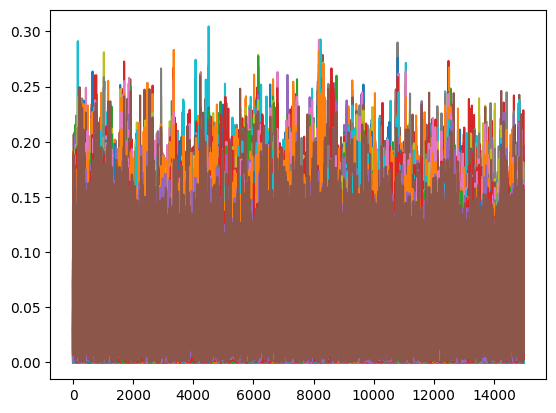

In [47]:
import pandas as pd
norm = pd.DataFrame(ncorr_all)
norm.to_csv("corr_all.csv")
plot_mult(np.array(ncorr_all), type = "corr_oneTimeMult_1_decimate")

In [52]:

ith_weight = 0
start = ith_weight*epochs
ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves_2_decimate)[start:start+epochs,:], n_traces = epochs, trace_len = 15000, ith_weight = 0)

Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

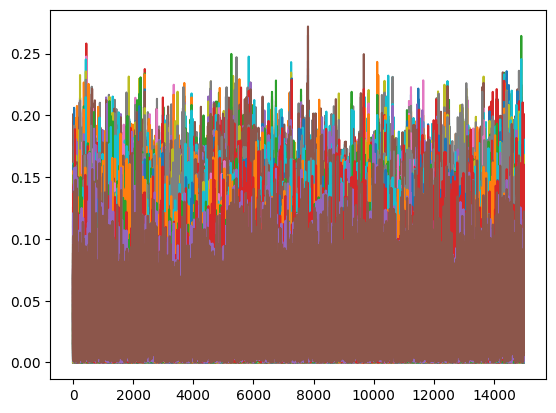

In [53]:
import pandas as pd
norm = pd.DataFrame(ncorr_all)
norm.to_csv("corr_all.csv")
plot_mult(np.array(ncorr_all), type = "corr_oneTimeMult_2_decimate")

### Plots

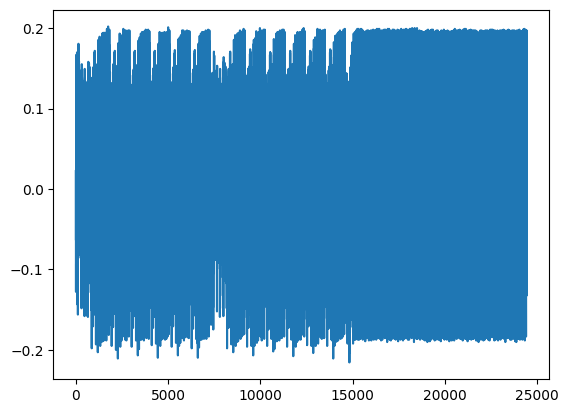

In [25]:
import matplotlib.pylab as plt
plt.plot(waves_2_decimate[0])

In [30]:
cw.plot(waves_1_decimate[0]) * cw.plot(waves_2_decimate[0])

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

In [27]:
cw.plot(waves_1_decimate[0])

:Curve   [x]   (y)

In [39]:
cw.plot(waves_2_decimate[0])

:Curve   [x]   (y)

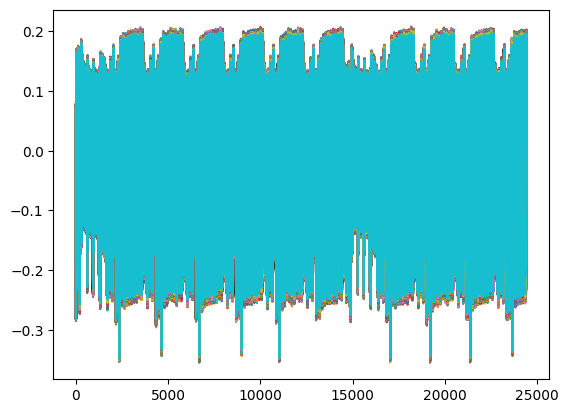

In [55]:
plot_mult(np.array(waves_1_decimate), type = "1000_one_time_mult_decimate_1")

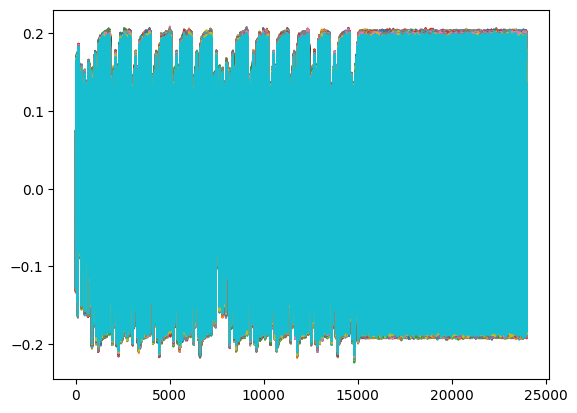

In [56]:
plot_mult(np.array(waves_2_decimate), type = "1000_one_time_mult_decimate_2")

In [ ]:
createDiffWave(waves_2_decimate, "one_time_mult_decimate_2")

In [ ]:
createDiffWave(waves_1_decimate, "one_time_mult_decimate_1")

AttributeError: 'list' object has no attribute 'savefig'

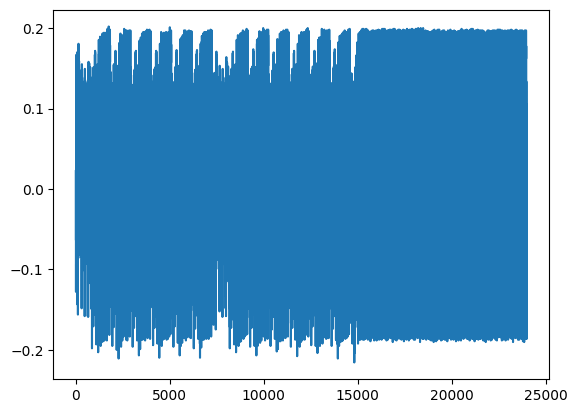

In [54]:
import matplotlib.pylab as plt
plt.plot(waves_2_decimate[0]).savefig(f'./figures/{epochs}_one_time_mult_wave_0_decimate_2.png')

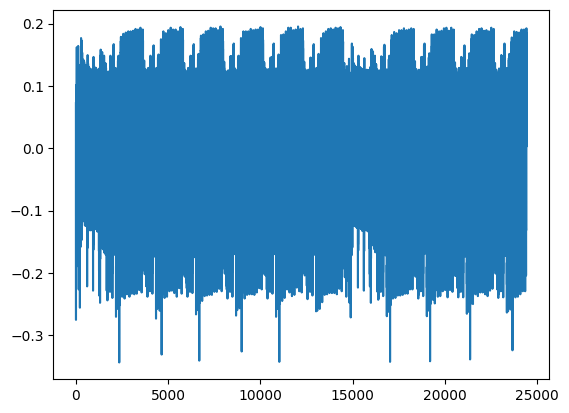

In [26]:
import matplotlib.pylab as plt
plt.plot(waves_1_decimate[0]).savefig(f'./figures/{epochs}_one_time_mult_wave_0_decimate_1.png')

In [29]:
cw_setuper._scope_disc_()

✔️ Firmware disconnected.


### Definitions

In [10]:
tmp_waves = []
for i in waves_2_decimate:
    tmp_wave = []
    for ii in range(24000):
        tmp_wave.append(i[ii])
    tmp_waves.append(tmp_wave)
waves_2_decimate = tmp_waves

NameError: name 'waves_2_decimate' is not defined